In [228]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols, lambdify, pprint
from sympy.solvers.ode.systems import dsolve_system
import scipy as sp
import time

In [4]:
#Explicit LMM
#first we find X_1, X_2 by Euler so we can start the method
#start by defining f
f = lambda t, x, n: np.array([[-1,1],[1,-1000]]) @ x[n,:] + np.array([2*np.sin(t[n]),1000*(np.cos(t[n])-np.sin(t[n]))]).T

In [257]:
#let h = 10e-5
h = 1e-4
t = np.arange(0,200+h,h)

In [258]:
#Euler to find X_1, X_2
X_0 = np.array([1,2])
X = np.array([X_0])
X_1 = X_0 + h * f(t,X,0)
X = np.vstack((X[0],X_1))
X_2 = X[1] + h * f(t, X, 1)
X = np.vstack((X,X_2))
Euler_X = X
print(X)

[[1.         2.        ]
 [1.0001     1.9001    ]
 [1.00019002 1.81018001]]


In [ ]:
start = time.time()
#initialise X with Euler found X_1, X_2
X = np.zeros((len(t),2))
X[:3,:] = Euler_X
h_ = h / 24
for i in range(3,len(X)):
    X[i,:] = 1.5 * X[i-1,:] - 0.5 * X[i-2,:] + h_ * (41 * f(t,X,i-1) - 40 * f(t,X,i-2) + 11 * f(t,X,i-3))
end = time.time()
print(end - start)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(t,X[:,0],label="x_1(t)")
plt.plot(t,X[:,1],label="x_2(t)")
plt.legend()
plt.title("Explicit Solution to IVP")
plt.xlabel("t")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(X[:,0],X[:,1])
plt.title("Explicit Solution to IVP")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

In [ ]:
#True solution

In [80]:
#diagonalize A
from scipy.linalg import eig
evals, P = eig(np.array([[-1,1],[1,-1000]]))
P @ np.diag(evals) @ np.linalg.inv(P)

array([[   -1.+0.j,     1.+0.j],
       [    1.+0.j, -1000.+0.j]])

In [81]:
#remove imaginary part which is 0
evals = np.real(evals)
evals

array([-9.989990e-01, -1.000001e+03])

In [131]:
Y_0 = np.linalg.solve(P,X_0)

In [132]:
#we can use sympy to find an exact solution
t = symbols("t",real=True,positive=True)
x, y = symbols("x y", cls=Function)
eqs = [Eq(x(t).diff(t),-evals[0]*x(t)+2*sin(t)), Eq(y(t).diff(t), -evals[1]*y(t) + 1000*(cos(t)-sin(t)))]
solution = dsolve_system(eqs, ics={x(0): Y_0[0], y(0): Y_0[1]})

/opt/anaconda3/lib/python3.7/site-packages/sympy/core/operations.py:68: SymPyDeprecationWarning: 

Add/Mul with non-Expr args has been deprecated since SymPy 1.7. Use
Expr args instead. See https://github.com/sympy/sympy/issues/19445 for
more info.

  deprecated_since_version="1.7"


In [216]:
t = symbols("t",real=True,positive=True)
x = symbols("x", cls=Function)
eqs = [Eq(x(t).diff(t),evals[0]*x(t)+2*sin(t))]
solution1 = dsolve(eqs, ics={x(0): Y_0[0]})

In [217]:
pprint(eqs[0])

d                                            
──(x(t)) = -0.998999000002073⋅x(t) + 2⋅sin(t)
dt                                           


In [218]:
#solution for first component of decoupled system
sol1 = lambdify(t, solution1[0].rhs)
solution1[0]

Eq(x(t), 0.999999498497749*sin(t) - 1.00100150099817*cos(t) + 2.00300299899104*exp(-0.998999000002073*t))

In [219]:
t = symbols("t",real=True,positive=True)
y = symbols("y", cls=Function)
eqs = [Eq(y(t).diff(t), evals[1]*y(t) + 1000*(cos(t)-sin(t)))]
solution2 = dsolve(eqs, ics={y(0): Y_0[1]})

In [220]:
pprint(eqs[0])

d                                                       
──(y(t)) = -1000.001001⋅y(t) - 1000⋅sin(t) + 1000⋅cos(t)
dt                                                      


In [221]:
#solution for first component of decoupled system
sol2 = lambdify(t, solution2[0].rhs)
solution2[0]

Eq(y(t), -0.998998002006997*sin(t) + 1.00099799600301*cos(t) + 0.998000002500247*exp(-1000.001001*t))

In [222]:
[x_1, x_2] = (P @ np.array([solution1[0].rhs,solution2[0].rhs]))

In [223]:
x_1

1.00099899399489*sin(t) - 1.00200299798629*cos(t) - 0.000998997500005635*exp(-1000.001001*t) + 2.0030019954863*exp(-0.998999000002073*t)

In [224]:
x_2

-0.997996502514384*sin(t) + 0.999995492504405*cos(t) + 0.997999502502125*exp(-1000.001001*t) + 0.00200500499346977*exp(-0.998999000002073*t)

In [225]:
#true solution of system
print("x_1(t)=",x_1)
print("x_2(t)=",x_2)

x_1(t)= 1.00099899399489*sin(t) - 1.00200299798629*cos(t) - 0.000998997500005635*exp(-1000.001001*t) + 2.0030019954863*exp(-0.998999000002073*t)
x_2(t)= -0.997996502514384*sin(t) + 0.999995492504405*cos(t) + 0.997999502502125*exp(-1000.001001*t) + 0.00200500499346977*exp(-0.998999000002073*t)


In [226]:
sol1 = lambdify(t, x_1, 'numpy')
sol2 = lambdify(t, x_2, 'numpy')

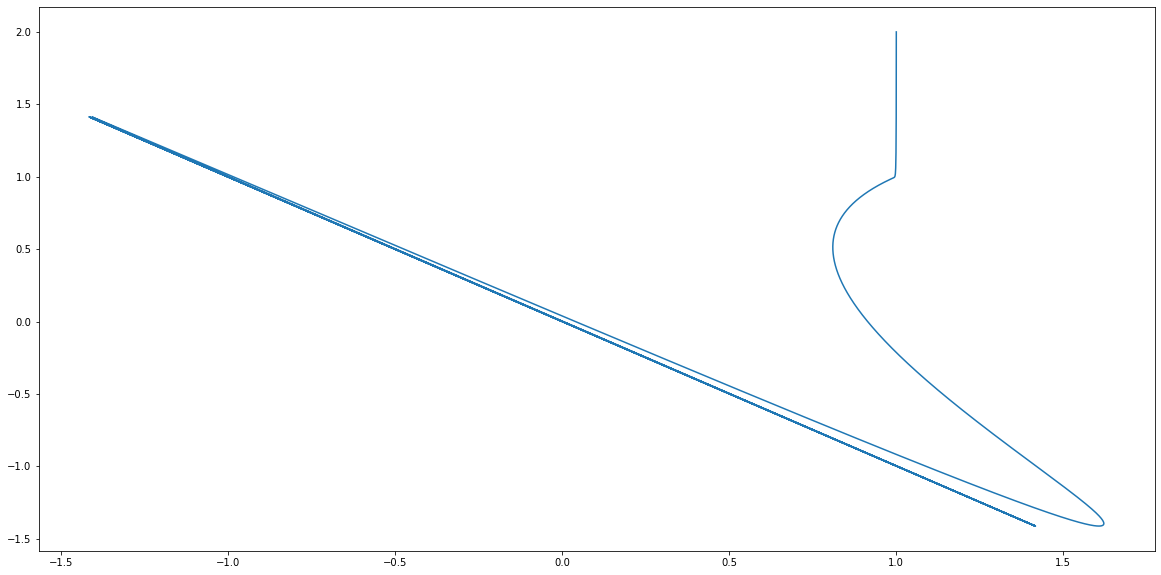

In [230]:
plt.figure(figsize=(20,10))
plt.plot(sol1(np.arange(0,30+h,h)),sol2(np.arange(0,30+h,h)))
plt.show()

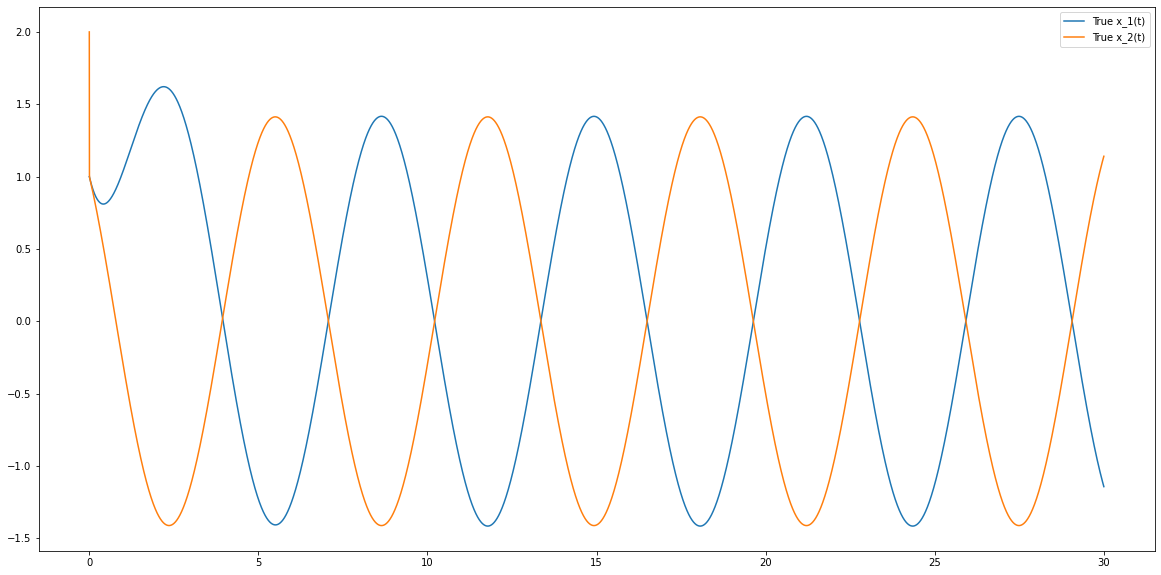

In [234]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(0,30+h,h),sol1(np.arange(0,30+h,h)),label = 'True x_1(t)')
plt.plot(np.arange(0,30+h,h),sol2(np.arange(0,30+h,h)), label = 'True x_2(t)')
plt.legend()
plt.show()

In [82]:
#make functions for decoupled system
f_y_1 = lambda t, y_1, n: evals[0] * y_1[n] + 2 * np.sin(t[n])
f_y_2 = lambda t, y_2, n: evals[1] * y_2[n] + 1000 * (np.cos(t[n]) - np.sin(t[n]))

In [83]:
#get first 3 values for each equation in y using euler
Y_0 = np.linalg.solve(P,X_0)
y_1_0, y_2_0 = Y_0

#for y_1
y_1 = np.array([y_1_0])
y_1_1 = y_1_0 + h * f_y_1(t, y_1, 0)
y_1 = np.vstack((y_1,y_1_1))
y_1_2 = y_1_1 + h * f_y_1(t, y_1, 1)
y_1 = np.vstack((y_1,y_1_2))
#for y_2
y_2 = np.array([y_2_0])
y_2_1 = y_2_0 + h * f_y_2(t, y_2, 0)
y_2 = np.vstack((y_2,y_2_1))
y_2_2 = y_2_1 + h * f_y_2(t, y_2, 1)
y_2 = np.vstack((y_2,y_2_2))

In [84]:
y_1

array([[1.0020015 ],
       [1.0019014 ],
       [1.00180133]])

In [85]:
y_2

array([[1.998998  ],
       [1.899098  ],
       [1.80917801]])

In [1]:
start = time.time()
#implicit with fixed point
#initialise X with Euler found X_1, X_2
X = np.zeros((len(t),2))
X[:3,:] = Euler_X
h_ = h / 24
count = 0
for i in range(3,len(X)):
    #initialise fixed point for current X_i
    x_prev = X[i-1,:]
    #remove constant part of formula from each iteration for efficiency
    g = 1.5 * X[i-1,:] - 0.5 * X[i-2,:] + h_ * (-31 * f(X[i-1]) + 32 * f(X[i-2]) - 13 * f(X[i-3])) + h * np.array([2*np.sin(t[i]),1000*(np.cos(t[i])-np.sin(t[i]))])
    #set max iters to 1000000
    for n in range(1000000):
        count += 1
        #update each iteration
        x_new =  h * np.array([[-1,1],[1,-1000]]) @ x_prev + g
        if (np.linalg.norm(x_new-x_prev, ord=2) / np.linalg.norm(x_new,ord=2)) < 1.0e-4:
            break
        x_prev = x_new
    X[i,:] = x_new
end = time.time()
print(end-start)
print(count)

NameError: name 'time' is not defined

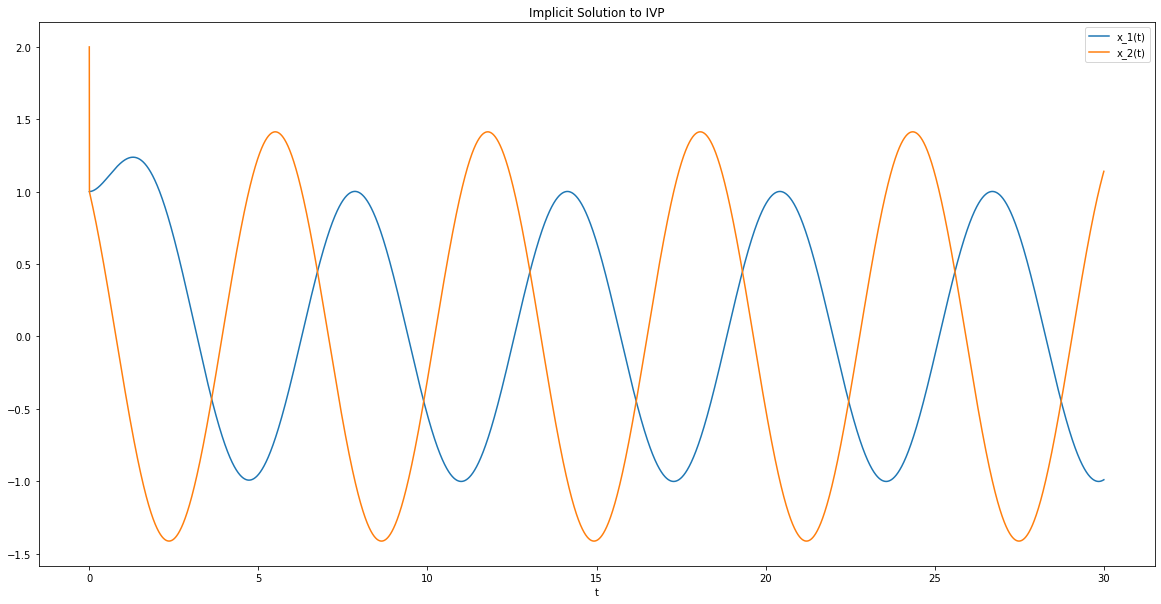

In [126]:
plt.figure(figsize=(20,10))
plt.plot(t,X[:,0],label="x_1(t)")
plt.plot(t,X[:,1],label="x_2(t)")
plt.legend()
plt.title("Implicit Solution to IVP")
plt.xlabel("t")
plt.show()

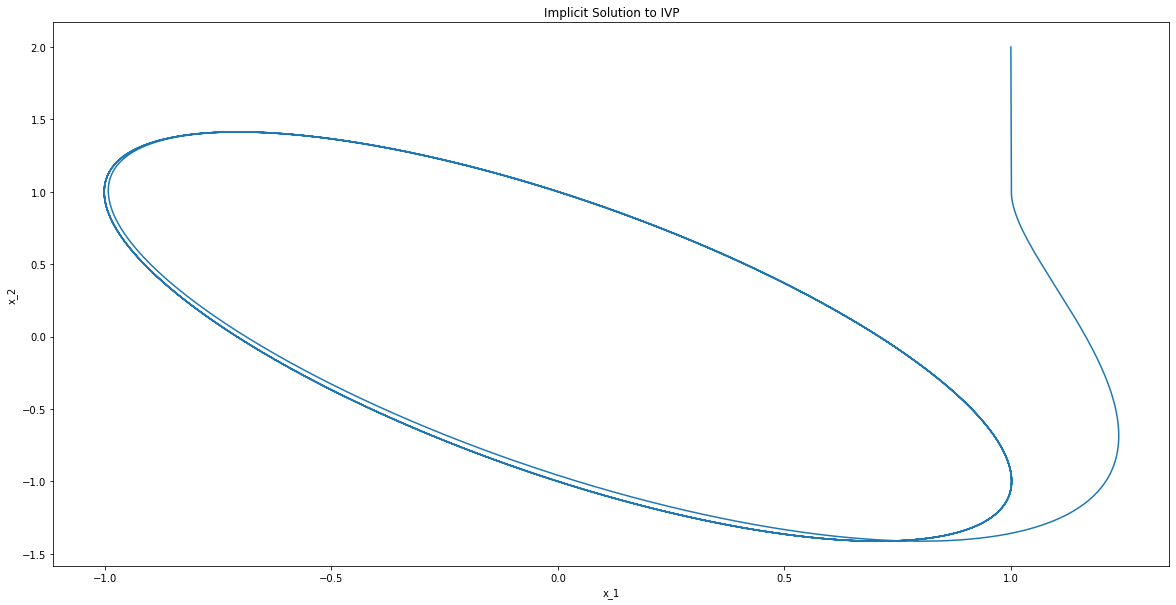

In [127]:
plt.figure(figsize=(20,10))
plt.plot(X[:,0],X[:,1])
plt.title("Implicit Solution to IVP")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

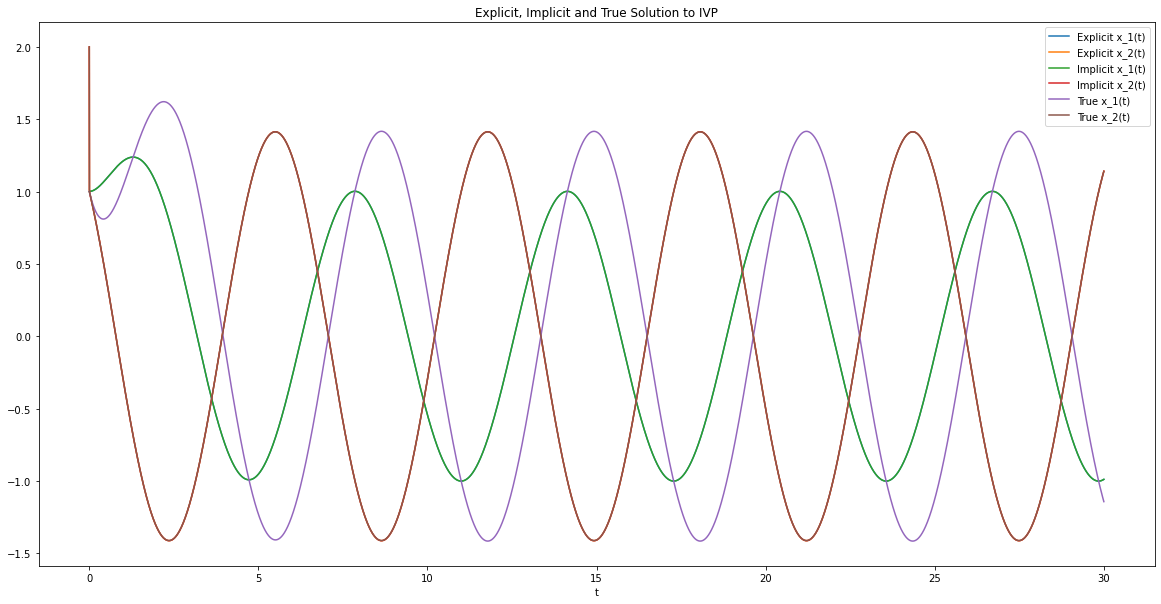

In [238]:
#let h = 10e-5
h = 1e-4
t = np.arange(0,30+h,h)
#on same axes
#initialise X with Euler found X_1, X_2
X = np.zeros((len(t),2))
X[:3,:] = Euler_X
h_ = h / 24
for i in range(3,len(X)):
    X[i,:] = 1.5 * X[i-1,:] - 0.5 * X[i-2,:] + h_ * (41 * f(t,X,i-1) - 40 * f(t,X,i-2) + 11 * f(t,X,i-3))
plt.figure(figsize=(20,10))
plt.plot(t,X[:,0],label="Explicit x_1(t)")
plt.plot(t,X[:,1],label="Explicit x_2(t)")

#implicit with fixed point
#initialise X with Euler found X_1, X_2
X = np.zeros((len(t),2))
X[:3,:] = Euler_X
h_ = h / 24
for i in range(3,len(X)):
    #initialise fixed point for current X_i
    x_prev = X[i-1,:]
    #remove constant part of formula from each iteration for efficiency
    g = 1.5 * X[i-1,:] - 0.5 * X[i-2,:] + h_ * (-31 * f(t,X,i-1) + 32 * f(t,X,i-2) - 13 * f(t,X,i-3)) + h * np.array([2*np.sin(t[i]),1000*(np.cos(t[i])-np.sin(t[i]))])
    #set max iters to 1000000
    for n in range(1000000):
        #update each iteration
        x_new =  h * np.array([[-1,1],[1,-1000]]) @ x_prev + g
        #tolerance criterion
        if (np.linalg.norm(x_new-x_prev, ord=2) / np.linalg.norm(x_new,ord=2)) < 1.0e-4:
            break
        x_prev = x_new
    X[i,:] = x_new

plt.plot(t,X[:,0],label="Implicit x_1(t)")
plt.plot(t,X[:,1],label="Implicit x_2(t)")
plt.xlabel("t")

plt.plot(np.arange(0,30+h,h),sol1(np.arange(0,30+h,h)),label = 'True x_1(t)')
plt.plot(np.arange(0,30+h,h),sol2(np.arange(0,30+h,h)), label = 'True x_2(t)')
plt.legend()
plt.title("Explicit, Implicit and True Solution to IVP")
plt.savefig("/Users/nikolaikrokhin/Downloads/NSODE_Coursework2_plot1.png")
plt.show()

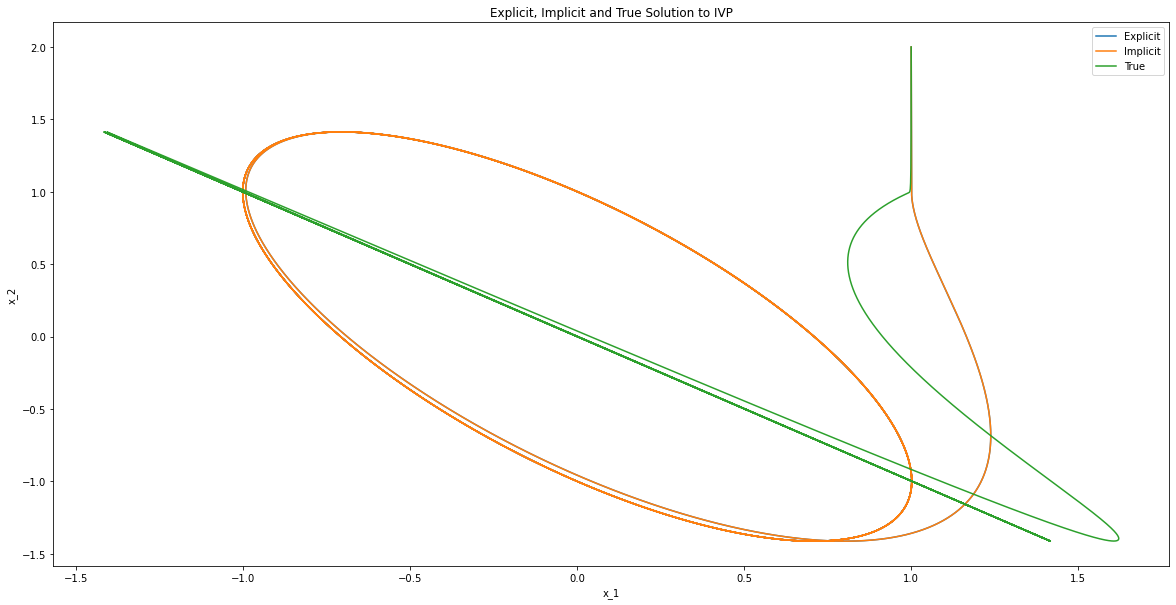

In [240]:
#on same axes
#initialise X with Euler found X_1, X_2
X = np.zeros((len(t),2))
X[:3,:] = Euler_X
h_ = h / 24
for i in range(3,len(X)):
    X[i,:] = 1.5 * X[i-1,:] - 0.5 * X[i-2,:] + h_ * (41 * f(t,X,i-1) - 40 * f(t,X,i-2) + 11 * f(t,X,i-3))
plt.figure(figsize=(20,10))
plt.plot(X[:,0],X[:,1],label="Explicit")
plt.xlabel("x_1")
plt.ylabel("x_2")

#implicit with fixed point
#initialise X with Euler found X_1, X_2
X = np.zeros((len(t),2))
X[:3,:] = Euler_X
h_ = h / 24
for i in range(3,len(X)):
    #initialise fixed point for current X_i
    x_prev = X[i-1,:]
    #remove constant part of formula from each iteration for efficiency
    g = 1.5 * X[i-1,:] - 0.5 * X[i-2,:] + h_ * (-31 * f(t,X,i-1) + 32 * f(t,X,i-2) - 13 * f(t,X,i-3)) + h * np.array([2*np.sin(t[i]),1000*(np.cos(t[i])-np.sin(t[i]))])
    #set max iters to 1000000
    for n in range(1000000):
        #update each iteration
        x_new =  h * np.array([[-1,1],[1,-1000]]) @ x_prev + g
        #tolerance criterion
        if (np.linalg.norm(x_new-x_prev, ord=2) / np.linalg.norm(x_new,ord=2)) < 1.0e-4:
            break
        x_prev = x_new
    X[i,:] = x_new

plt.plot(X[:,0],X[:,1],label="Implicit")
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.plot(sol1(np.arange(0,30+h,h)),sol2(np.arange(0,30+h,h)),label = 'True')

plt.title("Explicit, Implicit and True Solution to IVP")
plt.legend()
plt.savefig("/Users/nikolaikrokhin/Downloads/NSODE_Coursework2_plot2.png")
plt.show()

In [248]:
#let h = 10e-5
h = 1e-4
t = np.arange(0,30+h,h)

In [251]:
#max global error for implicit and global error at t =30
#implicit with fixed point
#initialise X with Euler found X_1, X_2
X = np.zeros((len(t),2))
X[:3,:] = Euler_X
h_ = h / 24
for i in range(3,len(X)):
    #initialise fixed point for current X_i
    x_prev = X[i-1,:]
    #remove constant part of formula from each iteration for efficiency
    g = 1.5 * X[i-1,:] - 0.5 * X[i-2,:] + h_ * (-31 * f(t,X,i-1) + 32 * f(t,X,i-2) - 13 * f(t,X,i-3)) + h * np.array([2*np.sin(t[i]),1000*(np.cos(t[i])-np.sin(t[i]))])
    #set max iters to 1000000
    for n in range(1000000):
        #update each iteration
        x_new =  h * np.array([[-1,1],[1,-1000]]) @ x_prev + g
        if (np.linalg.norm(x_new-x_prev, ord=2) / np.linalg.norm(x_new,ord=2)) < 1.0e-4:
            break
        x_prev = x_new
    X[i,:] = x_new
exact_X = np.zeros((len(t),2))
exact_X[:,0] = sol1(np.arange(0,30+h,h))
exact_X[:,1] = sol2(np.arange(0,30+h,h))
max_global_imp = -1
for i in range(len(exact_X)):
    err = np.linalg.norm(exact_X[i]-X[i])
    if err > max_global_imp:
        max_global_imp = err

print(max_global_imp)
print(err)


1.0459695440368237
0.15397479013258686


In [252]:
#max global error for explicit and global error at t =30
#initialise X with Euler found X_1, X_2
X = np.zeros((len(t),2))
X[:3,:] = Euler_X
h_ = h / 24
for i in range(3,len(X)):
    X[i,:] = 1.5 * X[i-1,:] - 0.5 * X[i-2,:] + h_ * (41 * f(t,X,i-1) - 40 * f(t,X,i-2) + 11 * f(t,X,i-3))
exact_X = np.zeros((len(t),2))
exact_X[:,0] = sol1(np.arange(0,30+h,h))
exact_X[:,1] = sol2(np.arange(0,30+h,h))
max_global_exp = -1
for i in range(len(exact_X)):
    err = np.linalg.norm(exact_X[i]-X[i])
    if err > max_global_exp:
        max_global_exp = err

print(max_global_exp)
print(err)

1.0458759859598825
0.15398797618005658
